## `points`: points du plan, relation d’ordre

Un *point* du plan est un couple $(x, y)$ (de nombres flottants).  
On définit la relation d’ordre suivante entre 2 points du plan :  
$$(x,y) \le (x',y') \iff x < x' \text{ ou } (x = x' \text{ et } y \le y').$$  
Un *nuage de points* est un ensemble fini de points.

### Question

Concevoir et coder un module `points` qui permet de définir des points,
de les comparer, d’afficher leurs coordonnées $(x,y)$ à l’écran.

In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from math import pow

def cree_p(x: float, y:float) -> list[float]:
    return [x,y]

def x(p: list[float]) -> float:
    x = p[0] 
    return x
def y(p: list[float]) -> float:
    y = p[1] 
    return y

def le(p1: list[int], p2: list[int]) -> bool:  
    if x(p1) < x(p2):
        return True
    elif x(p1) == x(p2) and y(p1) <= y(p2) :
        return True
    else:
        return False
    

def affiche_p(p: list[float]) -> tuple[float]:
    ord_abs = (x(p),y(p))
    return ord_abs

def distance( p1: list[int], p2: list[int]) -> float:
    dist = sqrt(pow((x(p2)-x(p1)),2) + pow((y(p2)-y(p1)),2))
    return dist


a= [0,1]
b= [2,4]
le(a,b)

True

## `nuage` : nuage de points : générer, trier, afficher, stocker, tracer

### Question

Ecrire un module `nuage` qui permet de définir un nuage de points de
taille paramétrable et de d’afficher les coordonnées de ses points à
l’écran.

In [2]:
def init_nuage(t: list[list[float]], n: int) -> list[list[float]] :
    assert 2 == len(t)
    for _ in range(2):
        assert n == len(t[_])
    cords = [0 for s in range(n)]
    for i in range(n):
            cords[i] = cree_p(t[0][i],t[1][i])
    return cords



def affiche_nuage(t: list[list[float]], n: int) ->  list[tuple[float]]:
    assert n == len(t)
    nuage = [(0,0) for v in range(n)]
    for i in range(n):
        nuage[i] = affiche_p(t[i])
    return nuage

t = [[10,5,3,9],
     [7,5,6,8]
    ]
t1 = init_nuage(t, 4)
print(t1)
affiche_nuage(t1, 4)

[[10, 7], [5, 5], [3, 6], [9, 8]]


[(10, 7), (5, 5), (3, 6), (9, 8)]

### Question

Compléter ce module de façon à pouvoir générer aléatoirement un nuage de
points de taille arbitraire et contenu dans le carré
$[0,1] \times [0,1]$.

In [3]:
import random

def rand_nuage(n: int) -> list[list[float]] :
    assert 2 == len(t)
    for _ in range(2):
        assert n == len(t[_])
    rand = [[0 for s in range(n)] for v in range(2)]
    for i in range(2):
        for j in range(n):
            rand[i][j] = random.uniform(0,1)
    nuag_rand = init_nuage(rand, n)
    return nuag_rand


### Question

Compléter ce module de façon à pouvoir trier les points d’un nuage donné
selon l’ordre croissant défini sur les points du plan.

In [15]:
def tri_nuage(t: list[list[float]],n: int) -> list[list[float]]:
    assert n == len(t)
    for i in range(n):
        i_min = i
        for j in range(i+1,n):
            if le(t[j],t[i_min]):
                i_min =j
        temp = t[i]
        t[i] =t[i_min]
        t[i_min] = temp
    return t
tri_nuage(t1,4)                

[[3, 6], [5, 5], [9, 8], [10, 7]]

### Question

Compléter ce module de façon à pouvoir enregistrer un nuage de points de
taille arbitraire dans un fichier de texte. La taille du nuage sera
aussi enregistrée dans ce fichier.  
Les fichiers `data_nuage_10.txt` et `data_nuage_100.txt` fournis dans
l’archive `3-data-nuage.zip` sont des exemples de tels fichiers.

In [5]:
def enregistre_data( t: list[list[float]],n: int) -> None:
    assert n == len(t)
    with open("./test_write.txt", "w", encoding="utf8") as f:
        f.write( str(n) + '\n' )
        for i in range(n):
            for j in range(2):
                f.write( str(t[i][j]) + '\t' )
            f.write ("\n")
        f.close ()
enregistre_data(t1,4)

### Question

Compléter ce module de façon à pouvoir lire un nuage de points de taille
arbitraire à partir d’un fichier de texte selon le format défini
ci-dessus.


In [23]:
def read_nuag(nomDuFichier: str)-> list[list[float]]:
    '''lit nomDuFichier au format txt et retourne un tableau 2D'''
    res = []
    with open(nomDuFichier, 'r' , encoding="utf-8") as f:
        for line in f:
            stripped_line = line.strip()
            line_list = stripped_line.split()
            res.append(line_list)
        f.close()
    return res
#PhL read_nuag(r"C:\Users\Med\Desktop\Programmation python/test_write.txt")
tttt = read_nuag(r"./test_write.txt")

### Question

Compléter ce module de façon à pouvoir tracer graphiquement un nuage de
points donné. Le tracé sera effectué à l’écran par défaut. Il permettra
aussi de stocker ce tracé dans un fichier `jpeg`.


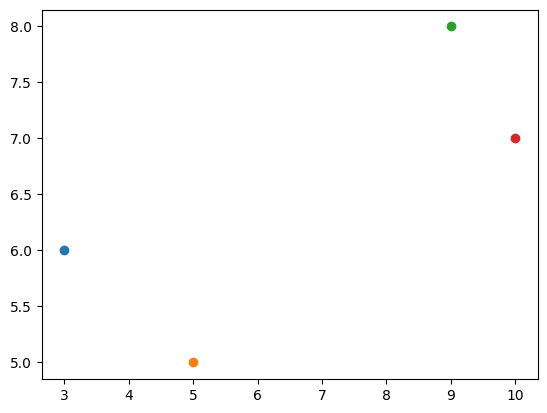

In [24]:
def tracer_nuage(t: list[list[int]], n: int) -> None:
    assert n == len(t)
    for i in range(n):
        plt.scatter(x(t[i]),y(t[i]))
tracer_nuage(t1,4)

In [25]:
# PhL

tracer_nuage(tttt, len(tttt))

IndexError: list index out of range

On va développer progressivement un module `geometrie2d`.

## `geometrie2d`: orientation de 3 points du plan

![Orientations d’un triplet (p,q,r)](attachment:fig/orientation_pqr.png)

Un triplet `(p,q,r)` de points *non alignés* du plan est *orienté
positivement* si l’angle des vecteurs `(pq, pr)` est dans $]0, \pi \ [$
(modulo $2\pi$). Sinon, il est *orienté négativement*.

On vérifie l’orientation du triplet `(p,q,r)` en calculant le signe du
déterminant 2x2 $det(pq,pr)$ des vecteurs `pq` et `pr`. Signe du
déterminant et sens d’orientation coïncident.

On rappelle que :
$$det(pq,pr) = (x_q - x_p)\times(y_r - y_p) - (y_q - y_p)\times(x_r -
x_p).$$

### Question

Commencer le module `geometrie2d` avec une fonction qui calcule
l’orientation d’un triplet de points du plan.

In [26]:
def orientation_triplet( triplet : list[list[int]]) -> int:
    for i in range(3):
        det1 = (x(triplet[1]) - x(triplet[0]))*(y(triplet[2]) - y(triplet[0])) 
        det2 = (x(triplet[2]) - x(triplet[0]))*(y(triplet[1]) - y(triplet[0]))
        det = det1 - det2
    if det >=0:
        return 1
    if det <0:
        return -1

In [27]:
trip = [[3, 6], [5, 5], [9, 8]]
orientation_triplet(trip)

1

## `geometrie2d`: enveloppe convexe supérieure

Un ensemble $C$ est *convexe* si le segment \[p,q\] qui relie deux
points quelconques de $C$ est inclus dans $C$.

![exemple d’ensembles convexes et non
convexe](attachment:fig/convexes.png)

L’*enveloppe convexe* $Conv(N)$ d’un nuage de points $N$ est le plus
petit polygone convexe qui contient tous les points de $N$.

![L’enveloppe convexe du nuage de points
‘data_nuage_10.txt’](attachment:fig/env_conv10.png) ![L’enveloppe
convexe du nuage de points
‘data_nuage_100.txt’](attachment:fig/env_conv100.png)

**Construire l’enveloppe convexe d’un nuage de points.** On construit
$Conv(N)$ en balayant de gauche à droite avec une droite verticale le
nuage $N$ (préalablement trié par ordre croissant). On convient ainsi
que p0 est le plus petit point de N, *ie.* celui le plus à gauche.

Chaque point p rencontré par la droite met à jour l’enveloppe convexe du
sous-nuage à gauche du point p.  Cette mise à jour s’effectue en
distinguant une partie supérieure et une partie inférieure de
l’enveloppe convexe.

L’*enveloppe supérieure* est au dessus du segment \[p0, p\]. Cette
enveloppe `ES` est modifiée par l’algorithme suivant qui justifie de
stocker `ES` comme une pile de base p0. On ajoute aussi à `ES`, p1 le
point immédiatement supérieur à p0 (*ie.* immédiatement à droite de p0).
La pile `ES` est ainsi composée d’au moins deux éléments.

### Algorithme

Soit p le point rencontré par le balayage de N. Notons q et r les deux
derniers points ajoutés à `ES` – q est au sommet.

-   Si le triplet (p,q,r) est orienté positivement alors p est ajouté à
    `ES`. Ce qui termine la mise à jour de `ES`.
-   Sinon q est retiré de `ES` et on reprend le test d’orientation et le
    traitement précédent pour **un nouveau triplet (p,q,r)** jusqu’à
    terminer la mise à jour de `ES` :
    -   par l’ajout de p à `ES`  
    -   ou parce qu’il ne reste que p0 dans `ES`. Dans ce cas, on
        termine en ajoutant p à `ES` – qui est ainsi toujours composée
        d’au moins deux éléments.

`ES` contient l’enveloppe convexe supérieure du nuage N une fois tous
les points p de N balayés.

On convient aisément que le point le plus à droite de N est le dernier
point ajouté à `ES`.

**Illustration graphique.**

`ES` = {0,1,5,6}, début du traitement de p = 7

![Orientation (7,6,5) négative](attachment:fig/ES-1.png)

`ES` = {0,1,5}, p = 7

![Orientation (7,5,1) négative](attachment:fig/ES-2.png)

`ES` = {0,1}, p = 7

![Orientation (7,1,0) positive](attachment:fig/ES-3.png)

`ES` = {0,1,7}, fin du traitement de p = 7.

### Question

Compléter le module précédent avec une fonction `majES(pile, point)` qui
effectue la mise à jour de la pile `ES` lors du traitement du point p. 


In [10]:
def init_pile(t: list[list[float]]) -> list[list[float]]:
    return t

def empiler(t: list[list[float]], val: int) -> None:
    t.append(val)

def depiler(t: list[list[float]]) -> None:
    t.pop()

def lang(t: list[list[float]]) -> int:
    return len(t)

def lireSommet(t: list[list[float]]) -> float:
    return t[-1]

def estVide(t: list[list[float]]) -> bool:
    if lang(t) == 0:
        return False
    


In [28]:
def majES(pile: list[float], point: list[float]) -> list[float]:

    k = lang(pile)-1
    while (k>0):
        triplet=[point, pile[k], pile[k-1]] 
        if orientation_triplet(triplet) <=0:  # PhL aie si 0
            depiler(pile[k])
            k -= 1
        else:
            empiler(pile, point)
            break
    return pile

### Question

Valider cette fonction sur des nuages de 4 ou 5 points par exemple.

In [29]:
t = [[10,5,3,9],
     [7,5,6,8]
    ]
t1 = init_nuage(t, 4)
t2 = tri_nuage(t1,4)
pi = [[3, 6], [5, 5], [9, 8]]
po = [10, 7]

pil_mitajour = majES(pi, po)
print(pil_mitajour)

[[3, 6], [5, 5], [9, 8], [10, 7]]


## `geometrie2d`: enveloppe convexe inférieure

L’*enveloppe convexe inférieure* est obtenue de façon similaire avec une
(autre) pile ‘EI’ et un test d’orientation inverse.

### Question

Compléter le module précédent avec une fonction `majEI(pile, point)` qui
effectue la mise à jour de la pile ‘EI’ lors du traitement du point p. 

In [30]:
def majEI(pile: list[float], point: list[float]) -> list[float]:

 
    k = lang(pile)-1
    while (k>0):
        triplet=[point, pile[k], pile[k-1]] 
        if orientation_triplet(triplet) >=0:
            depiler(pile[k])
            k -= 1
        else:
            empiler(pile, point)
            break
    return pile

### Question

Valider cette fonction sur des nuages de 4 ou 5 points par exemple.

In [31]:
t0 = [[0.012651907330708645, 0.46666371355228464], 
      [0.01761795096351637, 0.26033020644100424], 
      [0.26153794892074644, 0.663621888961113], 
      [0.8588962655977074, 0.8518922206904876]
     ] 


pi1 = [[0.012651907330708645, 0.46666371355228464], 
       [0.01761795096351637, 0.26033020644100424], 
       [0.26153794892074644, 0.663621888961113]
      ]
poi = [0.8588962655977074, 0.8518922206904876]
pil_mitajour = majEI(pi1, poi)
print( pil_mitajour)


[[0.012651907330708645, 0.46666371355228464], [0.01761795096351637, 0.26033020644100424], [0.26153794892074644], [0.8588962655977074, 0.8518922206904876]]
